In [1]:
from typing_extensions import TypedDict

class State(TypedDict):
    graph_state: str

In [2]:
def node_1(state):
    print("---Node 1---")
    return {"graph_state": state['graph_state'] +" I am"}

def node_2(state):
    print("---Node 2---")
    return {"graph_state": state['graph_state'] +" Max Verstappen,"}

def node_3(state):
    print("---Node 3---")
    return {"graph_state": state['graph_state'] +" Sebastian Vettel,"}

def node_4(state):
    print("---Node 4---")
    return {"graph_state": state['graph_state'] + " and I"}

def node_5(state):
    print("---Node 5---")
    return {"graph_state": state['graph_state'] + " won the"}

def node_6(state):
    print("---Node 6---")
    return {"graph_state": state['graph_state'] + " lost the"}

def node_7(state):
    print("---Node 7---")
    return {"graph_state": state['graph_state'] + " Monacco Grand Prix."}

def node_8(state):
    print("---Node 8---")
    return {"graph_state": state['graph_state'] + " 24 Hours of Le-Mans"}

In [3]:
import random
from typing import Literal

def decide_driver(state) -> Literal["node_2", "node_3"]:
    user_input = state['graph_state']
    if random.random() < 0.5:
        return "node_2"
    return "node_3"

def decide_win(state) -> Literal["node_5", "node_6"]:
    user_input = state['graph_state']
    if random.random() > 0.3:
        return "node_5"
    return "node_6"

def decide_race(state) -> Literal["node_7", "node_8"]:
    user_input = state['graph_state']
    if random.random() < 0.5:
        return "node_7"
    return "node_8"

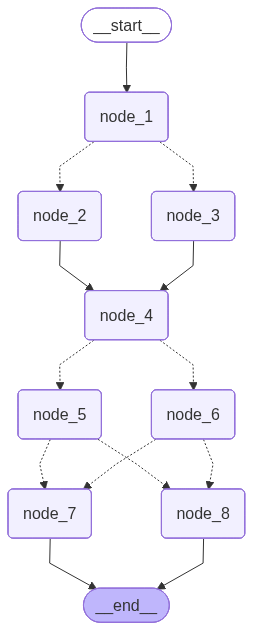

In [5]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

builder = StateGraph(State)
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)
builder.add_node("node_4", node_4)
builder.add_node("node_5", node_5)
builder.add_node("node_6", node_6)
builder.add_node("node_7", node_7)
builder.add_node("node_8", node_8)

builder.add_edge(START, "node_1")
builder.add_conditional_edges("node_1", decide_driver)
builder.add_edge("node_2", "node_4")
builder.add_edge("node_3", "node_4")
builder.add_conditional_edges("node_4", decide_win)
builder.add_conditional_edges("node_5", decide_race)
builder.add_conditional_edges("node_6", decide_race)
builder.add_edge("node_7", END)
builder.add_edge("node_8", END)


# Add
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [16]:
graph.invoke({"graph_state" : "It's lights out, and away we go. "})

---Node 1---
---Node 3---
---Node 4---
---Node 5---
---Node 7---


{'graph_state': "It's lights out, and away we go.  I am Sebastian Vettel, and I won the Monacco Grand Prix."}